# Ravi Ranjan
## Task-Predict the percentage of an student based on the no. of study hours.
### This is a simple linear regression task as it involves just 2 variables.

url for data which is used: http://bit.ly/w-data

In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# importing data from a link

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

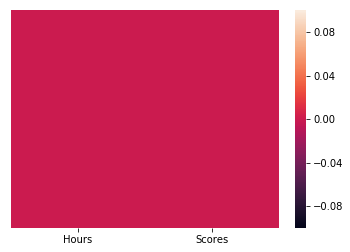

In [4]:
#check for missing values

sns.heatmap(data.isnull(),yticklabels=False)

In [5]:
#getting all the information about the features

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


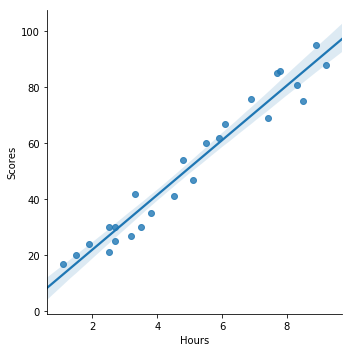

In [6]:
# Plotting the distribution of scores

sns.lmplot(x='Hours',y='Scores',data=data)

In [7]:
#assigning variables to dependent and independent feature

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [8]:
#splitting the records into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Model creation

In [9]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()

#training the data on the linear regression model

lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


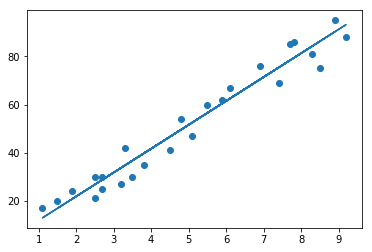

In [10]:
# Plotting the regression line

line = lr.coef_*X+lr.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
# Testing data - In Hours

print(X_test) 

# Predicting the scores on x_test data

y_pred = lr.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual-y_test and Predicted-y_pred values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0,0.5,'y_pred')

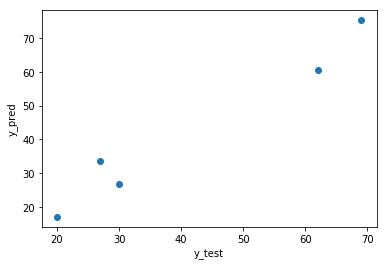

In [13]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [14]:
#geting accuracy

from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
# testing with the data

hours = 9.25
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
